In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_excel('UC Berkeley Data Test 2.xlsx')
df

,No,Nama Klinik,Date,Visit ke..,Area,Geo Location,Latitude,Longitude,Jenis Klinik,Jenis Layanan,...,Feedback,"Glossary\nMahal (4=sangat mahal, 1= Tidak mahal)\nTidak Tertarik (5=Sangat tertarik, 1= sangat tidak tertarik)",Mahal,Tidak Tertarik KlinikMe,Unnamed: 22,OVERLAPPING DENGAN PC LAIN,Unnamed: 24,VISIT LEBIH DARI 1X,Unnamed: 26,BATASAN PER BULAN
0,NaN,Klinik Pratama Wahyu Medika,2023-02-24,1.0,Beji,Klinik Pratama,"Umum, Gigi, dan Bidan",Beji,Klinik Pratama,"Umum, Gigi, dan Bidan",...,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Dr. Ahmad Musyafa Anshori,2023-02-27,1.0,Koja,NaN,NaN,NaN,Klinik Pratama,Kecantikan,...,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Dr. Diana,2023-02-27,NaN,Koja,NaN,NaN,NaN,Praktik Mandiri,Umum,...,NaN,NaN,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Klinik Alam Medika,2023-02-28,NaN,Penjaringan,NaN,NaN,NaN,Klinik Pratama,Umum & Gigi,...,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Klinik dr. Peggy Fauzy,2023-05-22,2.0,Beji,Klinik Pratama,Umum & Bidan,Beji,Klinik Pratama,Umum & Bidan,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Akira Skin & Beauty,2023-04-11,NaN,Kramat Jati,NaN,NaN,NaN,Praktik Mandiri,Kecantikan,...,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,MA Dental Care,2023-05-16,NaN,Pluit,NaN,NaN,NaN,Praktik Mandiri,Gigi,...,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Drg Yan Walando,2023-06-21,NaN,Pluit,NaN,NaN,NaN,Praktik Mandiri,Gigi,...,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Yahya Farma,2023-06-15,NaN,Bogor,NaN,NaN,NaN,Praktik Mandiri,Umum dan Apotek,...,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Klinik Avira 24 Jam (Umum),2022-12-13,NaN,Tebet,NaN,NaN,NaN,NaN,NaN,...,Belum Berminat,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

No                                                                                                                       float64
Nama Klinik                                                                                                               object
Date                                                                                                              datetime64[ns]
Visit ke..                                                                                                               float64
Area                                                                                                                      object
Geo Location                                                                                                              object
Latitude                                                                                                                  object
Longitude                                                                                        

In [19]:
pd.isnull('Mahal')

False

In [22]:
pd.isnull('Tidak Tertarik KlinikMe')

False

In [6]:
columns = ['Mahal', 'Tidak Tertarik KlinikMe']

In [7]:
correlation_matrix = df[columns].corr()
correlation_matrix

,Mahal,Tidak Tertarik KlinikMe
Mahal,1.000000,-0.268987
Tidak Tertarik KlinikMe,-0.268987,1.000000


<Axes: >

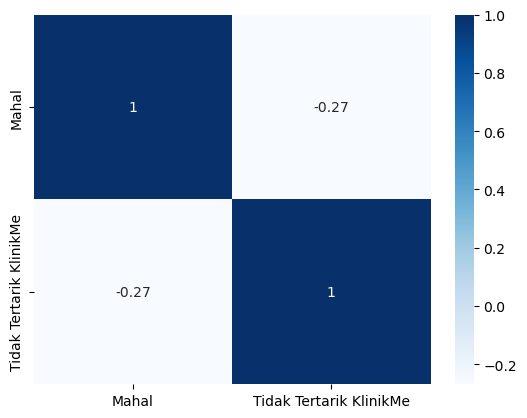

In [8]:
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')

In [9]:
df.tail()

,No,Nama Klinik,Date,Visit ke..,Area,Geo Location,Latitude,Longitude,Jenis Klinik,Jenis Layanan,...,Feedback,"Glossary\nMahal (4=sangat mahal, 1= Tidak mahal)\nTidak Tertarik (5=Sangat tertarik, 1= sangat tidak tertarik)",Mahal,Tidak Tertarik KlinikMe,Unnamed: 22,OVERLAPPING DENGAN PC LAIN,Unnamed: 24,VISIT LEBIH DARI 1X,Unnamed: 26,BATASAN PER BULAN
38,NaN,Klinik dr. Ade Hermawan,2023-01-24,NaN,Cisauk,NaN,NaN,NaN,Praktik Mandiri,Umum,...,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,Ira dental care,2023-02-14,NaN,Lubang Buaya,NaN,NaN,NaN,Praktik Mandiri,Gigi,...,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,Praktek dokter gigi drg. Ratni Ayu Dumilah,2023-02-16,2.0,Limo,NaN,NaN,NaN,Praktik Mandiri,Gigi,...,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,Praktek Dokter Gigi drg Sispa Marni,2023-01-24,NaN,Cisauk,NaN,NaN,NaN,Praktik Mandiri,Gigi,...,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,Praktek dr Rilla,2023-01-24,NaN,Cisauk,NaN,NaN,NaN,Praktik Mandiri,Umum,...,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Specify the column names to check for infinite values
column1_name = 'Mahal'
column2_name = 'Tidak Tertarik KlinikMe'

# Check for infinite values in the specified columns
is_inf_column1 = np.isinf(df[column1_name])
is_inf_column2 = np.isinf(df[column2_name])


# Check if there are any infinite values in the columns
if is_inf_column1.any() or is_inf_column2.any():
    print("There are infinite values in the specified columns.")
else:
    print("There are no infinite values in the specified columns.")

In [ ]:
# Specify the column names to check for infinite values
column1_name = 'Mahal'

# Check for infinite values in the specified columns
is_inf_column1 = np.isinf(df[column1_name])

# Check if there are any infinite values in the columns
if is_inf_column1.any() :
    print("There are infinite values in the specified columns.")
else:
    print("There are no infinite values in the specified columns.")

Intercept: 2.596491228070176
Coefficient: -0.3421052631578949


ValueError: x and y must have same first dimension, but have shapes (42, 1) and (9,)

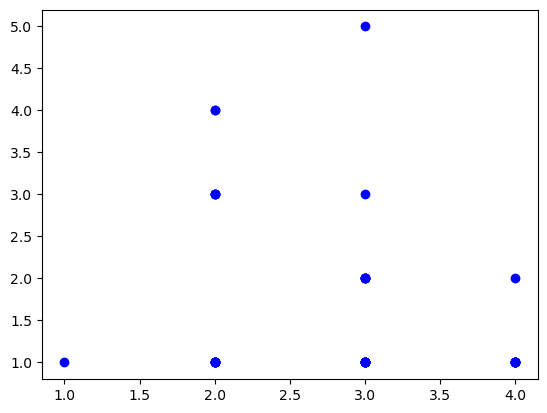

In [30]:
columns_to_dropna = ['Mahal', 'Tidak Tertarik KlinikMe']
df.dropna(subset=columns_to_dropna, inplace=True)

# Extract the two columns for linear regression
X = df['Mahal'].values.reshape(-1, 1)
y = df['Tidak Tertarik KlinikMe'].values

# Create an instance of LinearRegression
model = LinearRegression()

# Fit the data to the model
model.fit(X, y)

# Get the coefficients and intercept
coefficient = model.coef_[0]
intercept = model.intercept_

# Print the results
print("Intercept:", intercept)
print("Coefficient:", coefficient)

# Plot the actual data points
plt.scatter(X, y, color='blue', label='Actual')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Linear Regression')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [28]:
columns_to_dropna = ['Mahal', 'Tidak Tertarik KlinikMe']
df.dropna(subset=columns_to_dropna, inplace=True)

# Extract the two columns for classification
X = df[['Mahal']]
y = df['Tidak Tertarik KlinikMe']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Evaluate the model performance (e.g., accuracy)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.3333333333333333


In [40]:
columns_to_dropna = ['Mahal', 'Tidak Tertarik KlinikMe']
df.dropna(subset=columns_to_dropna, inplace=True)

# Extract the features and target variable
X = df['Mahal'].values
y = df['Tidak Tertarik KlinikMe'].values

# Create an instance of HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()

# Fit the model to the data
model.fit(X, y)

# Define the meshgrid range for the scatter plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.02  # Step size in the mesh

# Generate a grid of points within the meshgrid range
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class labels for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Add labels and a title to the plot
plt.xlabel('Mahal')
plt.ylabel('Tidak Tertarik KlinikMe')
plt.title('HistGradientBoostingClassifier Result')

# Show the plot
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[4. 3. 3. 4. 1. 4. 3. 4. 3. 2. 3. 3. 3. 4. 2. 2. 3. 4. 4. 2. 3. 3. 3. 2.
 3. 2. 2. 4. 2. 3. 3. 3. 2. 2. 2. 4. 3. 3. 2. 2. 2. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [34]:
print(df.shape)

(42, 28)


In [45]:
columns_to_dropna = ['Mahal', 'Tidak Tertarik KlinikMe']
df.dropna(subset=columns_to_dropna, inplace=True)

# Extract the features and target variable
X = df['Mahal'].values.reshape(-1, 1)
y = df['Tidak Tertarik KlinikMe'].values

# Create an instance of HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()

# Fit the model to the data
model.fit(X, y)

# Define the meshgrid range for the scatter plot
x_min, x_max = X.min() - 1, X.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
h = 0.02  # Step size in the mesh

# Generate a grid of points within the meshgrid range
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class labels for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatter plot of the data points
plt.scatter(X[:, 0], y, c=y, cmap=plt.cm.Paired, edgecolors='k')

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Add labels and a title to the plot
plt.xlabel('Mahal')
plt.ylabel('Tidak Tertarik KlinikMe')
plt.title('HistGradientBoostingClassifier Result')

# Show the plot
plt.show()

ValueError: X has 2 features, but HistGradientBoostingClassifier is expecting 1 features as input.